## Data Analysis and Prediction on Online Retail Sales Performance
### Provided By: Sina Ainesazi Dovom
#### 14/07/2023 Trondheim, Norway

### Importing needed Libraries

In [1129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import warnings
warnings.filterwarnings('ignore')
import itertools
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.preprocessing import scale

In [1130]:
df = pd.read_excel("Online Retail.xlsx")

In [1131]:
data = df.copy()

### Variables
1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each
transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely
assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer
resides.

In [1132]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 1: Data Cleaning and Exploration

In [1133]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Columns: 8 entries, InvoiceNo to Country
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [1134]:
df.shape

(541909, 8)

We are dealing with 8 features and 541909 instances. I would say the shape of the data is satisfying.

In [1135]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [1136]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [1137]:
df.index

RangeIndex(start=0, stop=541909, step=1)

In [1138]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [1139]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

The name of the columns make sense, So there's no need to rename them.

In [1140]:
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [1141]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have null values only in Description and CustomerID variables.

In [1142]:
df[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


Nothing special can be observed from the rows which CostumerID has NaN values. So we dropt this columns since it has so many missing values.

In [1143]:
df.drop(["CustomerID"], axis=1, inplace=True)

Let's check the Description variable.

In [1144]:
df[df['Description'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,United Kingdom


It's strange because in the rows which the description variable is missing the UnitPrice is 0.0.
So we can just fill in those rows for the Description variable as 'UNKNOWN' and keep it for later.

In [1145]:
df['Description'] = df['Description'].fillna('UNKNOWN')

In [1146]:
df[df['Description']=='UNKNOWN'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,UNKNOWN,56,2010-12-01 11:52:00,0.0,United Kingdom
1970,536545,21134,UNKNOWN,1,2010-12-01 14:32:00,0.0,United Kingdom
1971,536546,22145,UNKNOWN,1,2010-12-01 14:33:00,0.0,United Kingdom
1972,536547,37509,UNKNOWN,1,2010-12-01 14:33:00,0.0,United Kingdom
1987,536549,85226A,UNKNOWN,1,2010-12-01 14:34:00,0.0,United Kingdom


Let's convert the InvoiceDate into DataTime

In [1147]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [1148]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


Let's use describe method to checking on a quick summery statistics for "Quantity" and "UnitPrice" columns.

In [1149]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


This statistics shows a few interesting facts.
1. The minimum values for both 'Quantity' and 'UnitPrice' are negative, which is unusual.
2. We see that the standard deviations for both variables are quite large, suggesting a significant spread in the data. This, along with the massive gap between the max and 75th percentile, indicates the presence of outliers.

It might be a good idea to find out the reason, why do they contain negative values?
Let's take a look at those rows.
For Quantity:

In [1150]:
df[df['Quantity'].values < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom


It can be seen in the rows which the Quantity is a negative number the InvoiceNo variable starts with 'C'. This might be the word 'Cancel'. So, the that's the reason why this column contains negative numbers.
What about UnitPrice:

In [1151]:
df[df['UnitPrice'].values < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom


"Adjust bad debt" could mean that the company is recording a transaction to adjust for a bad debt. This might not be an actual sale but rather an accounting action. So, we see the InvoiceNo starts with 'A', this might be the word 'Accounting'.

We see this term is associated with negative values in UnitPrice, it could indicate that a sale was reversed because the debt was deemed uncollectable. This often happens when a company decides to write off a bad debt.

In general, we are analyzing sales data, let's deal with it later but it would be better to exclude these kinds of transactions, as they are not actual sales.
Let's use the describe method again:

#### Detecting outliers
It might be a good idea to inspect these distributions with scatterplot.
##### First, Let's take a look at UnitPrice variable.

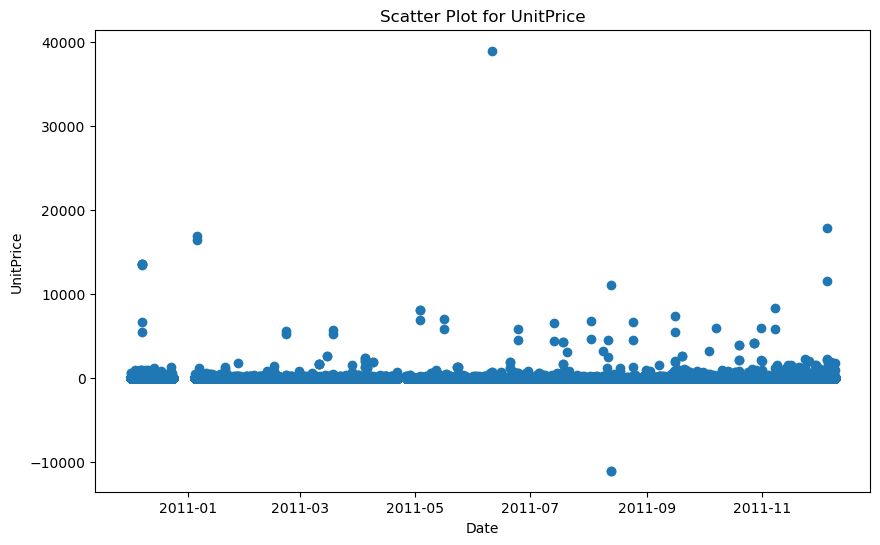

In [1152]:
# Plotting a scatter plot for the UnitpRrice variable.
plt.figure(figsize=(10,6))
plt.scatter(x=df['InvoiceDate'], y=df['UnitPrice'])
plt.title('Scatter Plot for UnitPrice')
plt.xlabel('Date')
plt.ylabel('UnitPrice')
plt.show()

This plot shows a negative outlier for the UnitPrice which we found the reason of that and also one datapoint is extremely out of range which is close to 40000, this also is an outlier so we should eliminate these from the data.

In [1153]:
# Removing negative values and extreme outliers from UnitPrice.
# since the negative values for this column were due to Accounting issue. this might not help us for the sale analysis.
df = df[(df['UnitPrice'] > 0)]
df = df[(df['UnitPrice'] < 20000)]

#### And for Quantity variable:

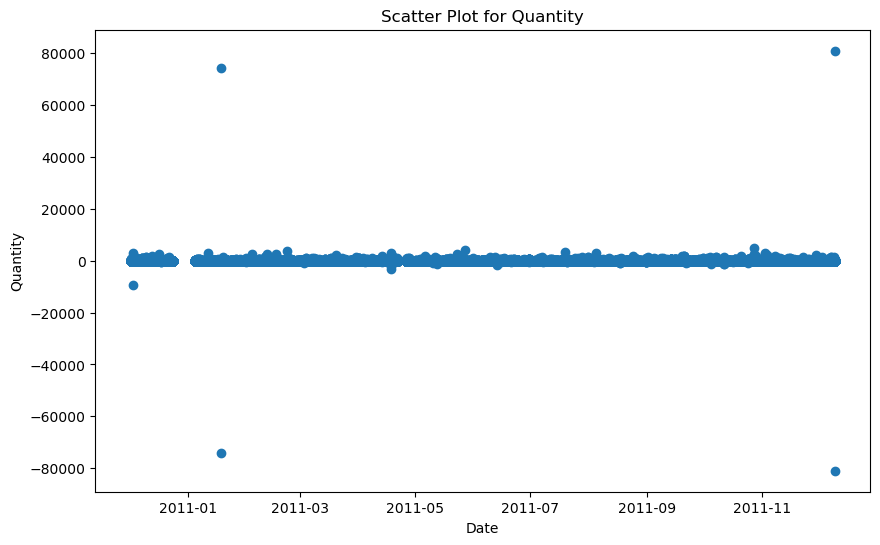

In [1154]:
# Plotting a scatter plot for Quantity variable
plt.figure(figsize=(10,6))
plt.scatter(x=df['InvoiceDate'], y=df['Quantity'])
plt.title('Scatter Plot for Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

This plot shows negative outliers for the Quantity varibale which we can guess the reason and also two datapoints are extremely out of range which are close to 80000, these also are outliers so we should eliminate from the data.
Actually, the negative values also could be a potential subject to go deep and analyze these kind of Invoices but for this project I am gonna ignore those.

In [1155]:
# Removing negative values and extreme outliers from Quantity.
df = df[(df['Quantity'] > 0)]
df = df[(df['Quantity'] < 20000)]

#### Let's take closer look at the UnitPrice.

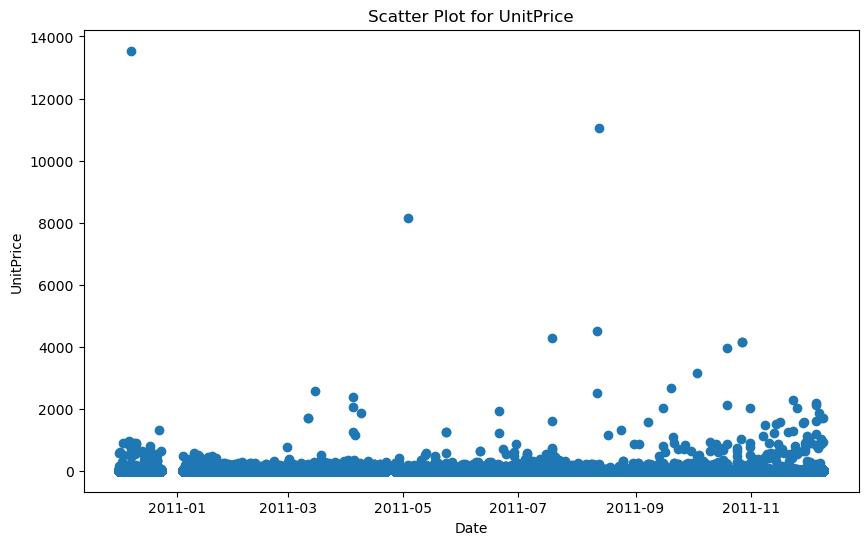

In [1156]:
# Plotting again to see if the outliers are removed.
plt.figure(figsize=(10,6))
plt.scatter(x=df['InvoiceDate'], y=df['UnitPrice'])
plt.title('Scatter Plot for UnitPrice')
plt.xlabel('Date')
plt.ylabel('UnitPrice')
plt.show()

Again some outliers can be observed. Let's take a look to see what are these outliers.

In [1157]:
df_high_price = df[(df['UnitPrice'] >= 4000) & (df['UnitPrice'] <= 14000)]
df_high_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,United Kingdom
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,France


The detected outliers are 'AMAZON FEE', 'POSTAGE' and 'Adjust bad debt', 'Manual' and 'DOTCOM POSTAGE' and based on the purpose of our analysis, we won't get useful and helpful information from these. Therefore eliminating these instances from the data would be resonable.

In [1158]:
# Checking on the number of instances with AMAZON FEE.
df[df['Description'] == 'AMAZON FEE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,United Kingdom
135534,547901,AMAZONFEE,AMAZON FEE,1,2011-03-28 11:57:00,219.76,United Kingdom


In [1159]:
# Checking on the number of instances with POSTAGE.
df[df['Description'] == 'POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,France
...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,Germany


In [1160]:
# Checking on the number of instances with Adjust bad debt.
df[df['Description'] == 'Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom


In [1161]:
# Checking on the number of instances with Manual.
df[df['Description'] == 'Manual']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,United Kingdom
...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,2011-12-05 13:11:00,219.50,United Kingdom
526018,580646,M,Manual,800,2011-12-05 13:13:00,0.25,United Kingdom
530876,580884,M,Manual,1,2011-12-06 12:21:00,0.85,United Kingdom
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,United Kingdom


As for the Manual, since we don't have strange high price and it might be useful since it may have connection with the product which have been sold in the invoice. I decide to keep it. 

In [1162]:
# Checking on the number of instances with DOTCOM POSTAGE.
df[df['Description'] == 'DOTCOM POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,United Kingdom
...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,United Kingdom


In [1163]:
# Keeping only the rows where the Description is not one of those.
df = df[~df['Description'].isin(['AMAZON FEE', 'POSTAGE', 'Adjust bad debt', 'DOTCOM POSTAGE', 'Manual'])]

Checking on the distribution of the UnitPrice after eliminating the outliers.

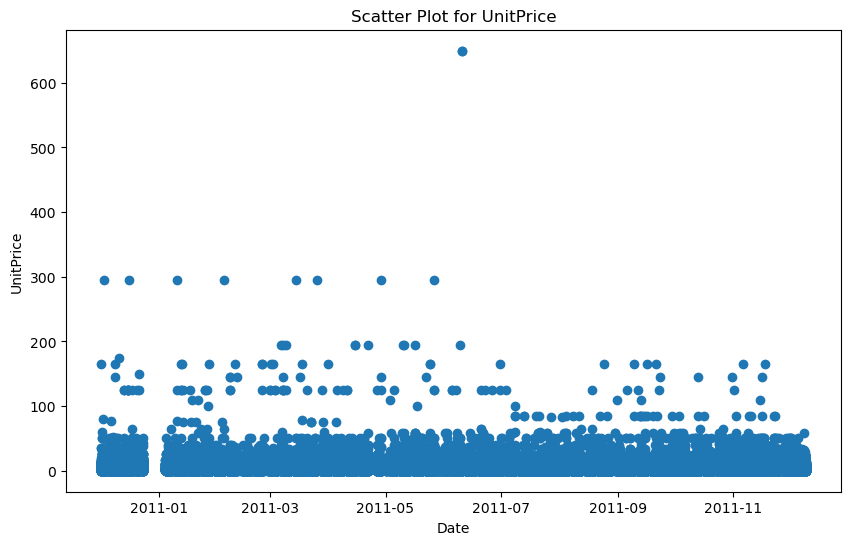

In [1164]:
# Plotting again to see if the outliers are removed.
plt.figure(figsize=(10,6))
plt.scatter(x=df['InvoiceDate'], y=df['UnitPrice'])
plt.title('Scatter Plot for UnitPrice')
plt.xlabel('Date')
plt.ylabel('UnitPrice')
plt.show()

Still one item has very different high price. let's see what's that product.

In [1165]:
df_high_price = df[(df['UnitPrice'] >= 400) & (df['UnitPrice'] <= 800)]
df_high_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,United Kingdom


This product PICNIC BASKET WICKER 60 PIECES has high price and in only 2 invoices contain this product and they're strange because in one invoice the quantity of this product is 1 but in the other it's 60. Despite being rare and high-priced, they are valid transactions. They could provide interesting insights, for example, demonstrating that high-ticket items, though infrequently purchased, can contribute significantly to sales.

Since we will develope a predictive model to forecast sales, these outliers might distort our model. In this case, I might consider removing these data points to avoid biasing the models.

In [1166]:
# removing product PICNIC BASKET WICKER 60 PIECES from the data.
df = df[~df['Description'].isin(['PICNIC BASKET WICKER 60 PIECES'])]

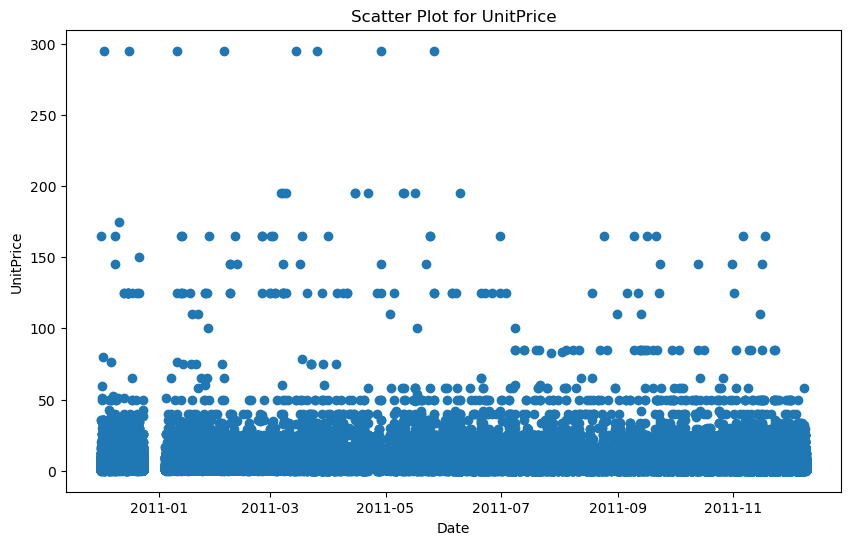

In [1167]:
# Plotting again to see what happened after removing PICNIC BASKET WICKER 60 PIECES product.
plt.figure(figsize=(10,6))
plt.scatter(x=df['InvoiceDate'], y=df['UnitPrice'])
plt.title('Scatter Plot for UnitPrice')
plt.xlabel('Date')
plt.ylabel('UnitPrice')
plt.show()

Let's statistically check:

In [1168]:
df.describe()

,Quantity,UnitPrice
count,527943.000000,527943.000000
mean,10.270088,3.276817
std,37.727047,4.267979
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,11.000000,4.130000
max,4800.000000,295.000000


#### Let's check on the Quantity variable.

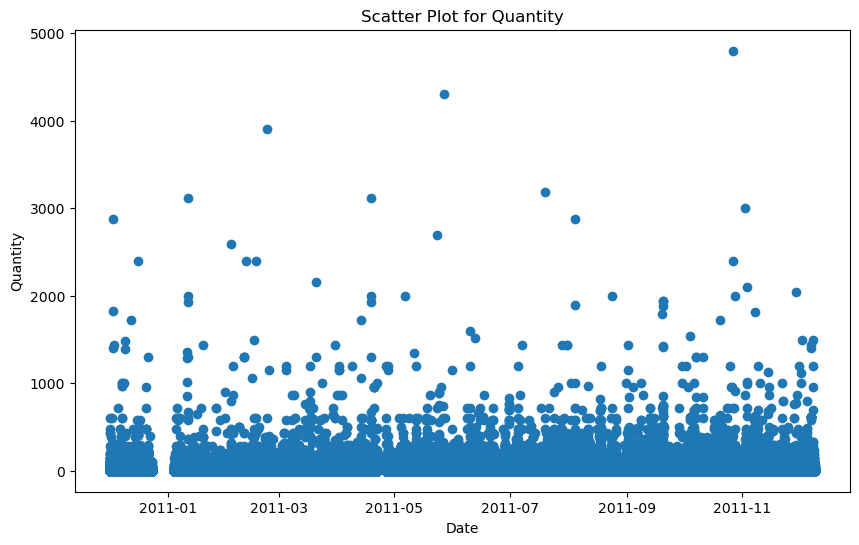

In [1169]:
# Plotting a scatter plot for Quantity variable
plt.figure(figsize=(10,6))
plt.scatter(x=df['InvoiceDate'], y=df['Quantity'])
plt.title('Scatter Plot for Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

Comparing to the size of our dataset this plot shows there are a few datapoints having values higher than 2000, let's see what are these products.

In [1170]:
df_high_quantity = df[(df['Quantity'] >= 2000) & (df['Quantity'] <= 5000)]
df_high_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,United Kingdom
91772,544152,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,2011-02-16 12:10:00,0.06,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,United Kingdom
125282,547037,21967,PACK OF 12 SKULL TISSUES,2160,2011-03-20 10:37:00,0.25,United Kingdom
160545,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2011-04-18 13:20:00,1.69,United Kingdom


These are all valid transactions. Let's check what are the ones which have very high values.

In [1171]:
df_high_quantity = df[(df['Quantity'] >= 4000) & (df['Quantity'] <= 5000)]
df_high_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,United Kingdom


These are also valid. I decide to keep them.
Now out data is much cleaner and ready for modelling.

### Task 2: Visualization

First we need to create a new column that represents the Sales.

In [1175]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [1176]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [1177]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,14.85


#### Let's check on the Sales trend over time on monthly basis and weekly basis.

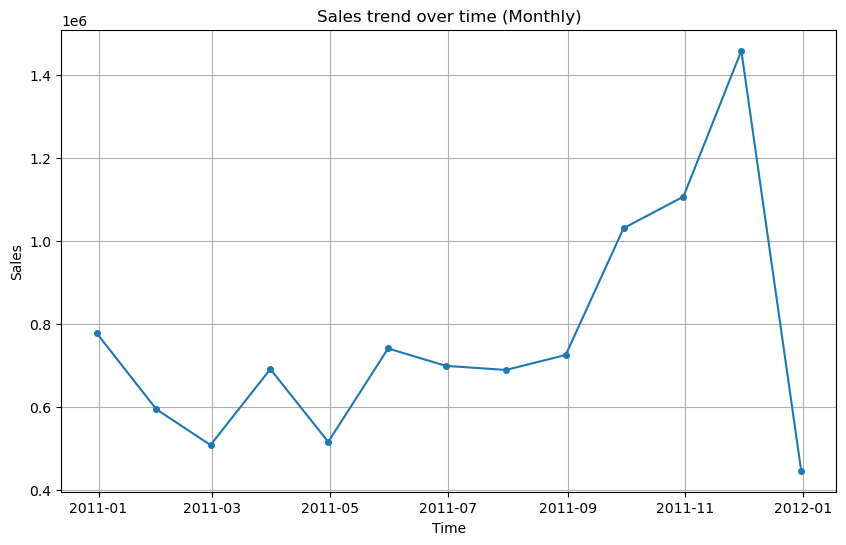

In [1178]:
# Resample 'Sales' on a monthly basis and sum
monthly_sales = df.resample('M', on='InvoiceDate')['Sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', markersize=4)
plt.title('Sales trend over time (Monthly)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid()
plt.show()

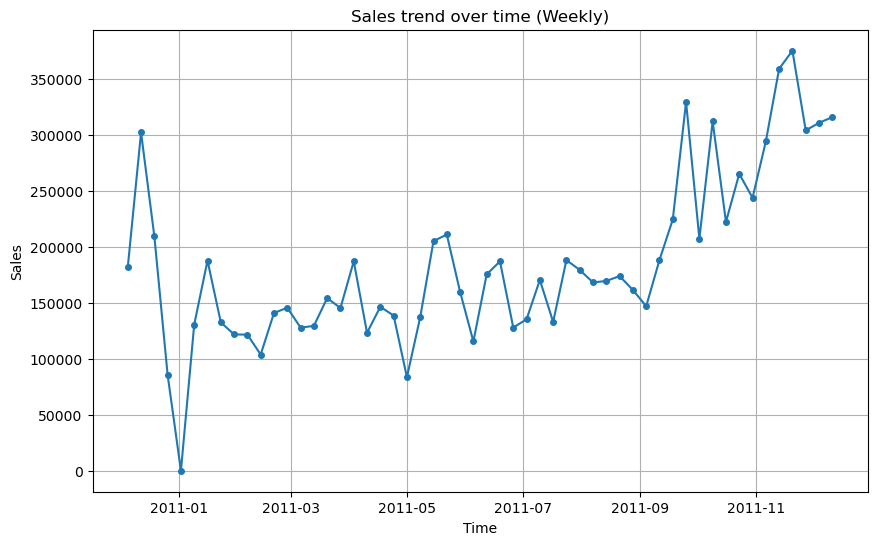

In [1179]:
# Resample 'Sales' on a weekly basis and sum
weekly_sales = df.resample('W', on='InvoiceDate')['Sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', markersize=4)
plt.title('Sales trend over time (Weekly)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid()
plt.show()

Why the sales is zero in 2011-01?!
Let's see which week!!

In [1180]:
weekly_sales['09-2010':'02-2011']

InvoiceDate
2010-12-05    181559.68
2010-12-12    302110.98
2010-12-19    209421.77
2010-12-26     85530.93
2011-01-02         0.00
2011-01-09    130595.67
2011-01-16    187678.06
2011-01-23    132518.83
2011-01-30    121738.30
2011-02-06    121544.43
2011-02-13    103757.97
2011-02-20    140867.03
2011-02-27    145593.66
Freq: W-SUN, Name: Sales, dtype: float64

Maybe the store was closed in that week because of the new year. and there's no transactions have been occured.

#### Let's check on the Sales distribution across different countries.

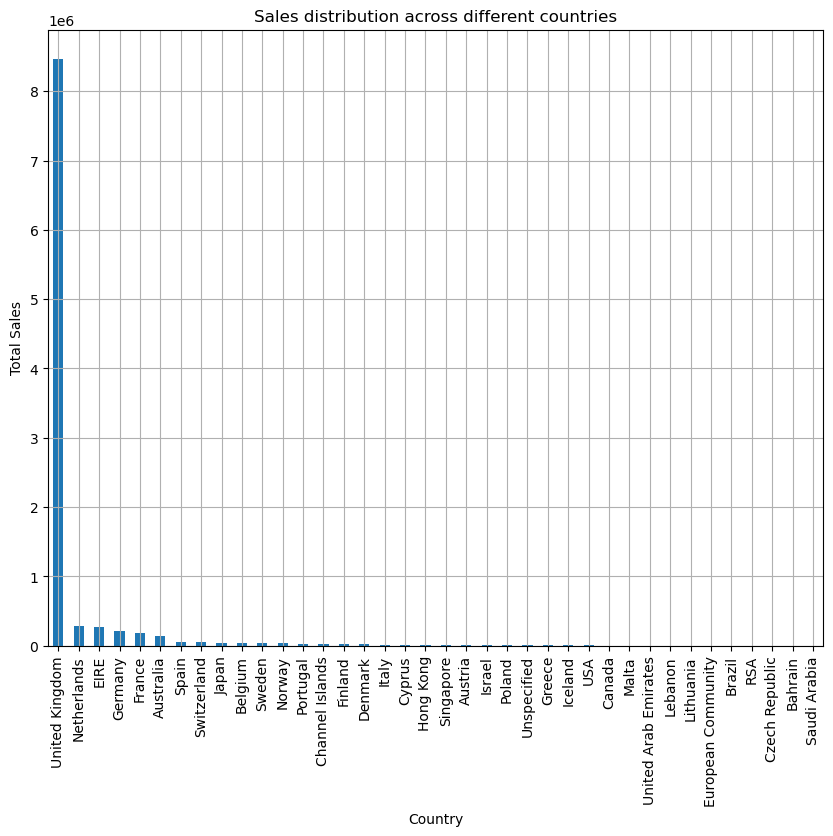

In [1181]:
# Grouping the data by 'Country' and summing the 'Sales'
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,8))
country_sales.plot(kind='bar')
plt.title('Sales distribution across different countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


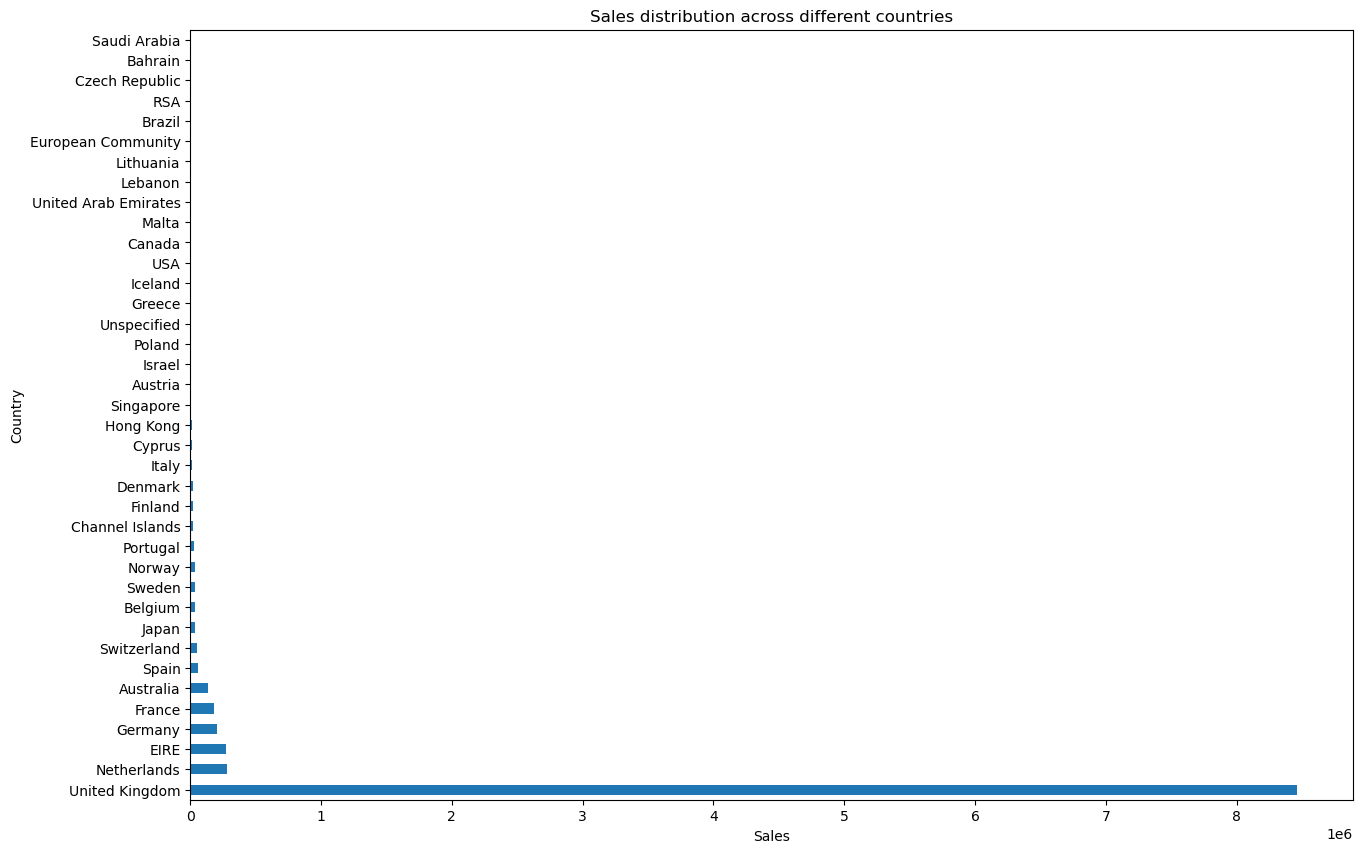

In [1240]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
country_sales.plot(kind='barh')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.title('Sales distribution across different countries')
plt.show()

This plot shows that the majority of the Sales are related to the UK. So let's see how much of the Sales are for UK.

In [1182]:
UK = df[df['Country'] == 'United Kingdom']['Country'].count()
ALL = df['Country'].count()
print(UK/ALL * 100)

91.6913378906435


So, almost the 92 percent of the Sales are for UK.

Let's Sales for the other countries better. (Without UK)

In [1183]:
df_without_UK = df[df['Country'] != 'United Kingdom']
df_without_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.60
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60


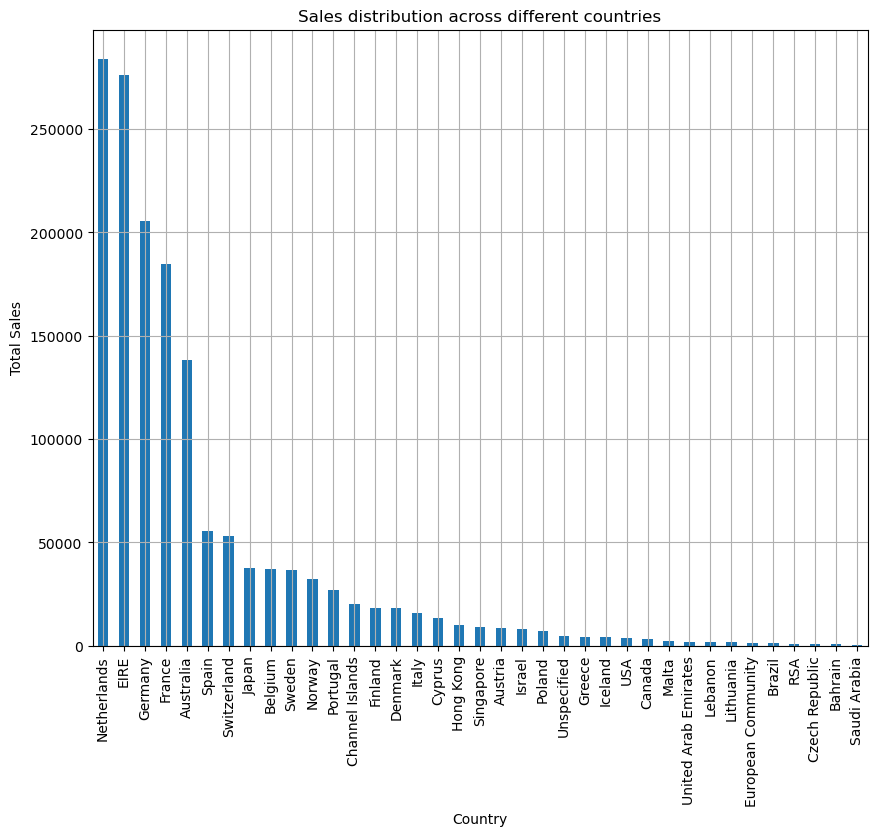

In [1184]:
# Grouping the data by 'Country' and summing the 'Sales'
country_sales = df_without_UK.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,8))
country_sales.plot(kind='bar')
plt.title('Sales distribution across different countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


So, after UK, the highest Sales are related to the Netherlands, Ireland, Germany, France and Australia respectively.
Let's have also a horizontal chart for that:

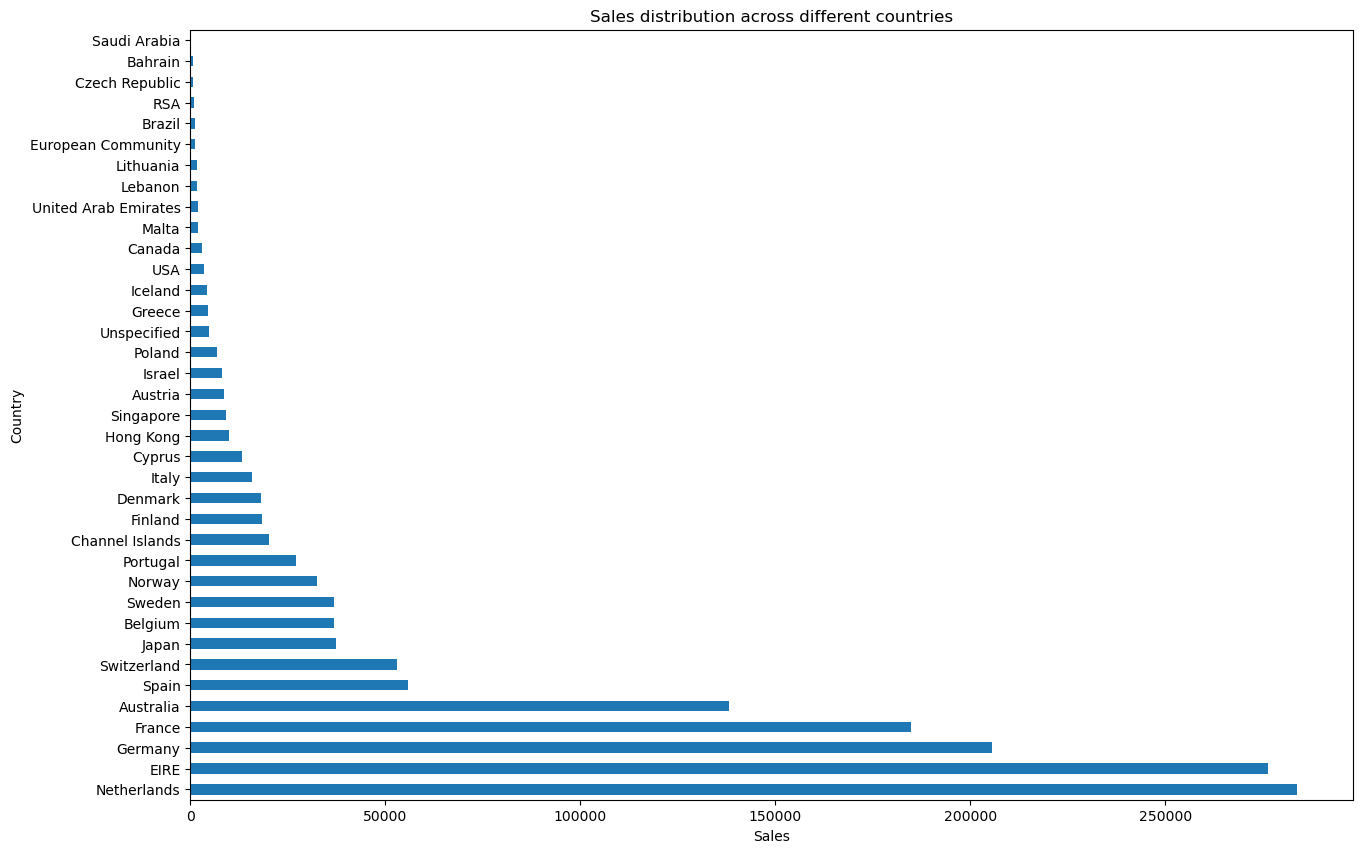

In [1185]:
plt.figure(figsize=(15,10))
country_sales.plot(kind='barh')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.title('Sales distribution across different countries')
plt.show()

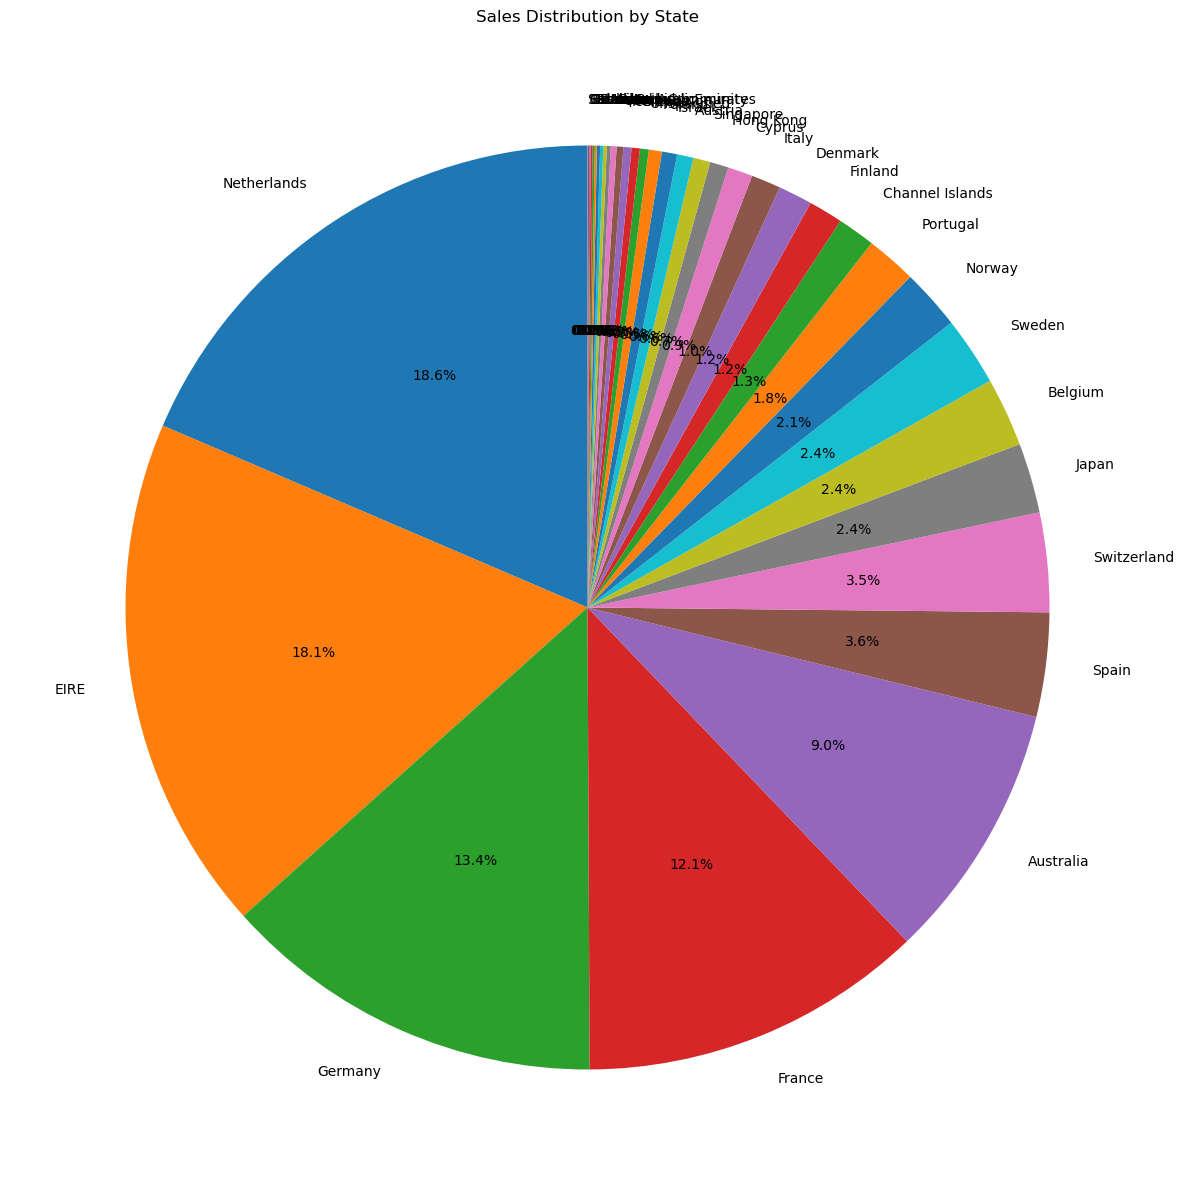

In [1186]:
country_sales = df_without_UK.groupby('Country')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales Distribution by State')

plt.show()

#### Let's check on the Sales based on different product categories. 
First top 15 products with highest Sales.

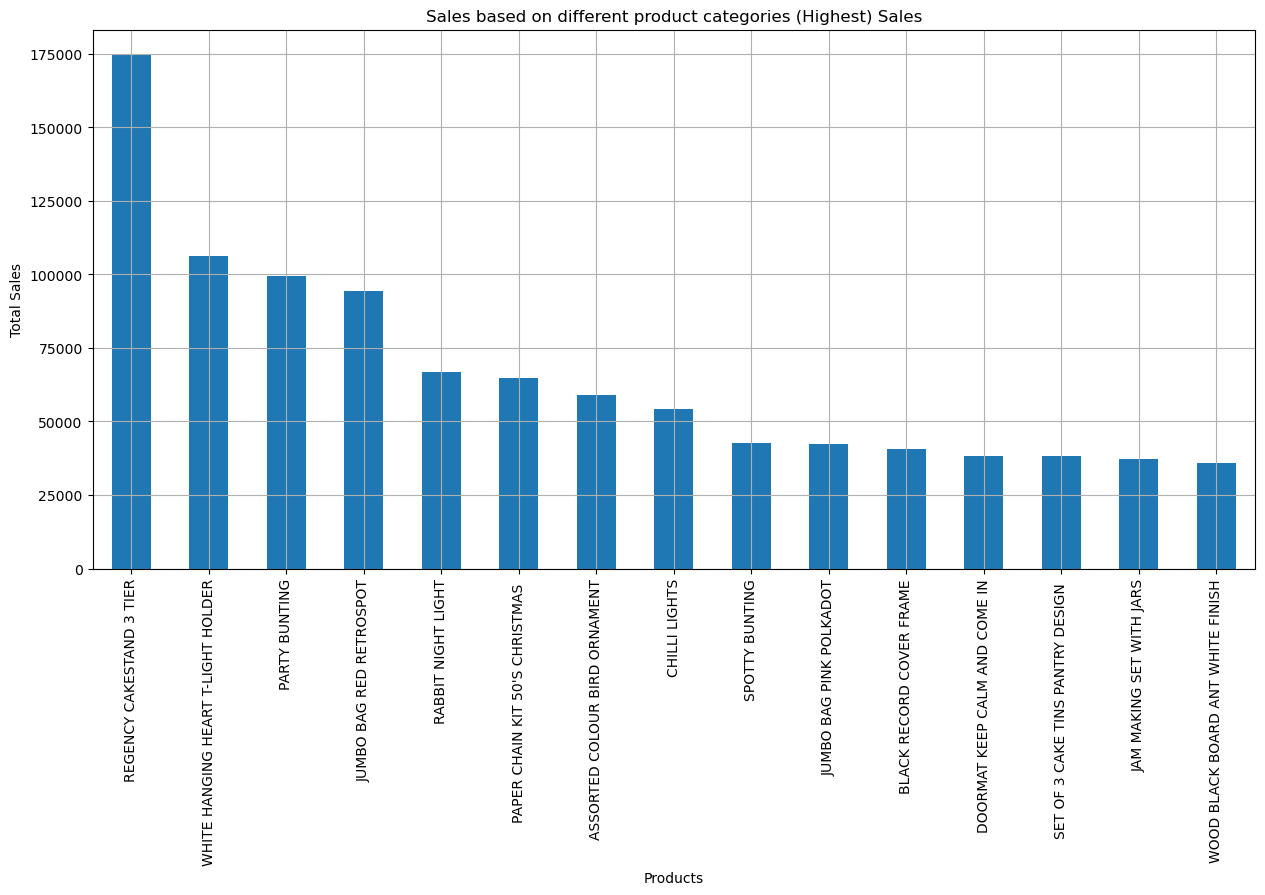

In [1241]:
top_15_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(15)

#Plotting
plt.figure(figsize=(15,7))
top_15_products.plot(kind='bar')
plt.title('Sales based on different product categories (Highest) Sales')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

15 products with the lowest Sales.

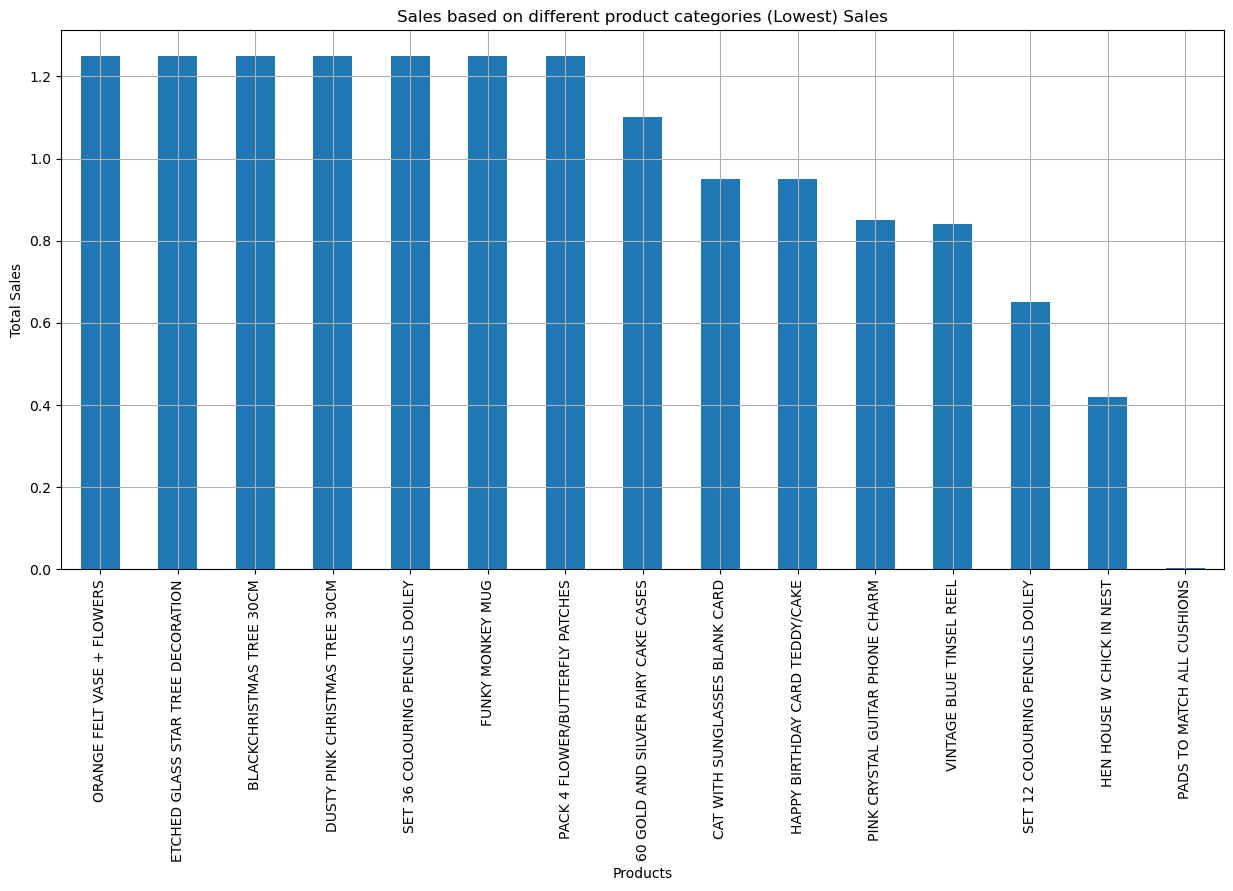

In [1242]:
lowest_15_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).tail(15)

#Plotting
plt.figure(figsize=(15,7))
lowest_15_products.plot(kind='bar')
plt.title('Sales based on different product categories (Lowest) Sales')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### This might be interesting to find out which products have the highest quantity in the Invoices.

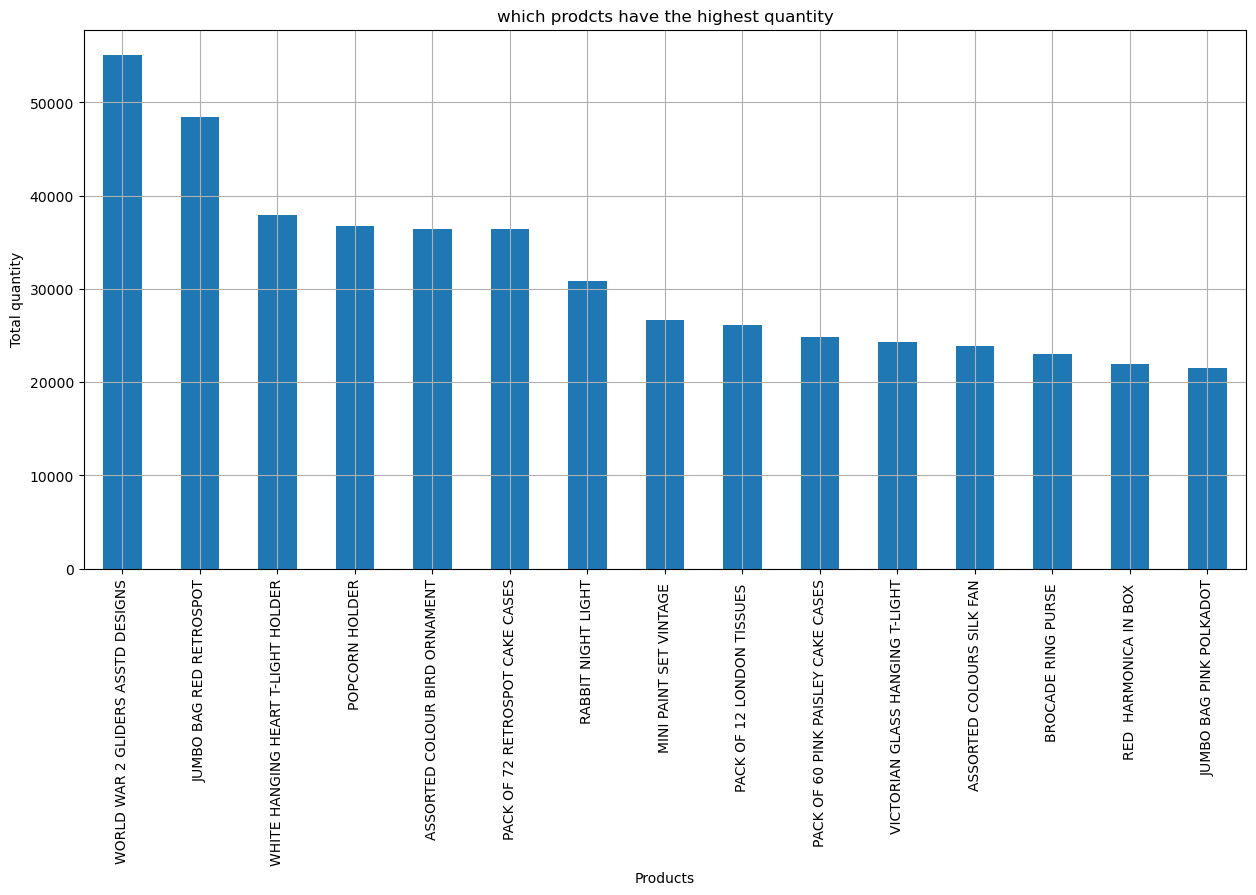

In [1243]:
high_quantity_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

#Plotting
plt.figure(figsize=(15,7))
high_quantity_products.plot(kind='bar')
plt.title('which prodcts have the highest quantity')
plt.xlabel('Products')
plt.ylabel('Total quantity')
plt.grid(True)
plt.show()

#### And also we can check which product has the highest Sales in UK

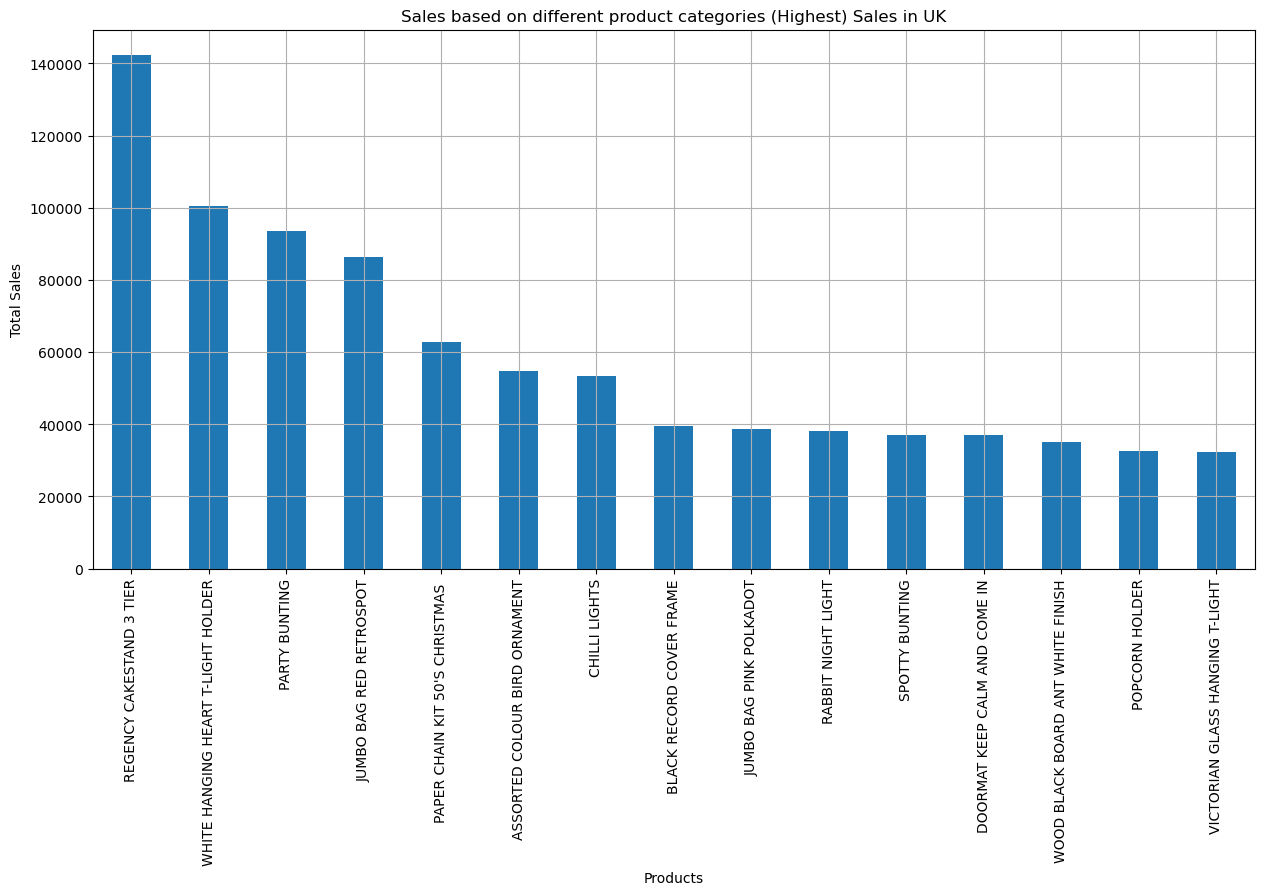

In [1244]:
df_UK = df[df['Country'] == 'United Kingdom']
highest_15_products_UK = df_UK.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(15)

#Plotting
plt.figure(figsize=(15,7))
highest_15_products_UK.plot(kind='bar')
plt.title('Sales based on different product categories (Highest) Sales in UK')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### And also we can check which product has the highest Sales in countries other than UK.

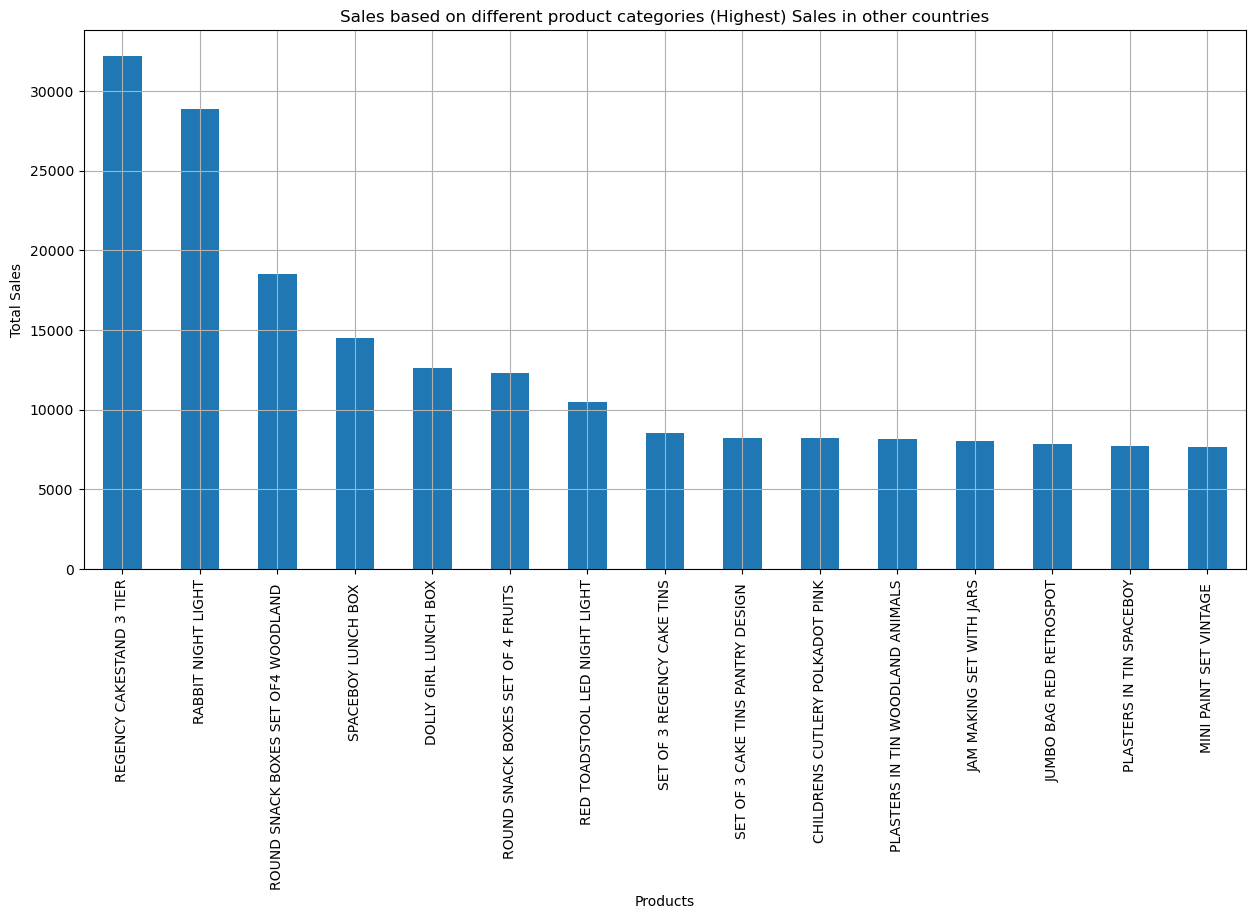

In [1245]:
highest_15_products_nonUK = df_without_UK.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(15)

#Plotting
plt.figure(figsize=(15,7))
highest_15_products_nonUK.plot(kind='bar')
plt.title('Sales based on different product categories (Highest) Sales in other countries')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Modelling
We are gonna use some Machine learning models for the Analysis of Sales and we are gonna be using only the UK dataset for this purpose. Since UK has the highest number of sales among the other countries.
1. Modelling for the product sales
2. Modelling for the UnitPrice with new variables over time
#### Feature Engineering Part

In [1192]:
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [1193]:
description_counts = df_UK['Description'].value_counts()
print(description_counts)

WHITE HANGING HEART T-LIGHT HOLDER    2227
JUMBO BAG RED RETROSPOT               1957
REGENCY CAKESTAND 3 TIER              1710
PARTY BUNTING                         1614
LUNCH BAG RED RETROSPOT               1421
                                      ... 
FLOWER FAIRY 5 SUMMER DRAW LINERS        1
HEAVENS SCENT FRAGRANCE OILS ASSTD       1
OCEAN SCENT CANDLE JEWELLED DRAWER       1
PINK CHRYSANTHEMUMS ART FLOWER           1
BLACK SIL'T SQU CANDLE PLATE             1
Name: Description, Length: 4000, dtype: int64


In [1194]:
num_unique_descriptions = df_UK['Description'].nunique()
print(f"There are {num_unique_descriptions} unique descriptions.")

There are 4000 unique descriptions.


In [1195]:
num_unique_codes = df_UK['StockCode'].nunique()
print(f"There are {num_unique_codes} unique codes.")

There are 3909 unique codes.


In [1196]:
df_UK.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
Sales                 float64
dtype: object

Let's start with the InvoiceDate feature and extract other useful features.
I am gonna build new dataframe for modelling part:

In [1197]:
new_df = df_UK.copy()

In [1198]:
new_df['Year'] = new_df['InvoiceDate'].dt.year
new_df['Month'] = new_df['InvoiceDate'].dt.month
new_df['Day'] = new_df['InvoiceDate'].dt.day
new_df['Hour'] = new_df['InvoiceDate'].dt.hour

In [1035]:
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,8


In [1036]:
# Calculate frequency of each country
#country_sales = new_df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Get the top 12 countries
#top_12_countries = country_sales[:12].index

# Create a new column where countries not in the top 12 are replaced with 'Other'
#new_df['Country_Reduced'] = new_df['Country'].where(new_df['Country'].isin(top_12_countries), 'Other')

In [1037]:
#counrty_counts = new_df['Country_Reduced'].value_counts()
#print(counrty_counts)

In [1038]:
# Replace each country with its frequency
#new_df['Country_Encoded'] = new_df['Country_Reduced'].map(new_df['Country_Reduced'].value_counts())

In [1039]:
#num_unique_countries = new_df['Country_Encoded'].nunique()
#print(f"There are {num_unique_countries} unique countries.")

In [1040]:
#counrty_counts = new_df['Country_Encoded'].value_counts()
#print(counrty_counts)

In [1041]:
#encoder = TargetEncoder()

# Fit and transform the 'Country' column
#new_df['Country_Target_Encoded'] = encoder.fit_transform(new_df['Country_Reduced'], new_df['Sales'])

In [1042]:
#num_unique_countries = new_df['Country_Target_Encoded'].nunique()
#print(f"There are {num_unique_countries} unique countries.")

In [1043]:
#counrty_counts = new_df['Country_Target_Encoded'].value_counts()
#print(counrty_counts)

For handling the StockCode feature, I am going to apply one encoding strategy on this variable:

1. Label Encoding: Using label encoding, where each StockCode is assigned a unique numeric identifier. This can be a good option for tree-based models, which can handle categorical features encoded in this way.

I will use the Lable Encoding before the splitting the dataset.

In [1229]:
# converting the type of StockCode variable into type string
new_df['StockCode'] = new_df['StockCode'].astype(str)
# Label Encoding
le = preprocessing.LabelEncoder()
new_df['StockCode_LabelEncoded'] = le.fit_transform(new_df['StockCode'])

In [1230]:
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,Year,Month,Day,Hour,StockCode_LabelEncoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,1,8,3401
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,8,2726
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,1,8,2950
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,8,2894
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,8,2893


In [1231]:
stock_counts = new_df['StockCode_LabelEncoded'].value_counts()
print(stock_counts)

3401    2169
3381    1957
1308    1710
2667    1614
174     1421
        ... 
92         1
3611       1
3610       1
3397       1
2766       1
Name: StockCode_LabelEncoded, Length: 3909, dtype: int64


In [1232]:
new_df.dtypes

InvoiceNo                         object
StockCode                         object
Description                       object
Quantity                           int64
InvoiceDate               datetime64[ns]
UnitPrice                        float64
Country                           object
Sales                            float64
Year                               int64
Month                              int64
Day                                int64
Hour                               int64
StockCode_LabelEncoded             int64
dtype: object

### Building Machine learning models

In [1233]:
# Defining the features X and the target y
X = new_df.drop(['Sales', 'StockCode', 'InvoiceNo', 'Description', 'Country', 'InvoiceDate'], axis=1) 
y = new_df['Sales']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1234]:
X

,Quantity,UnitPrice,Year,Month,Day,Hour,StockCode_LabelEncoded
0,6,2.55,2010,12,1,8,3401
1,6,3.39,2010,12,1,8,2726
2,8,2.75,2010,12,1,8,2950
3,6,3.39,2010,12,1,8,2894
4,6,3.39,2010,12,1,8,2893
...,...,...,...,...,...,...,...
541889,12,1.95,2011,12,9,12,1348
541890,8,2.95,2011,12,9,12,980
541891,24,1.25,2011,12,9,12,2118
541892,24,8.95,2011,12,9,12,442


In [1235]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1236]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
LinearRegression_model = LinearRegression()

In [1237]:
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
DecisionTreeRegressor_model = DecisionTreeRegressor()

In [1238]:
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
RandomForestRegressor_model = RandomForestRegressor()

In [1239]:
cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=LinearRegression_model,
                       DecisionTreeRegressor=DecisionTreeRegressor_model,
                       RandomForest=RandomForestRegressor_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.434052180175344
MAE for LinearRegression
9.584676719467357
MSE for LinearRegression
2246.3321466554703
R2 score for LinearRegression
0.451872233580899
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.9622217795775703
MAE for DecisionTreeRegressor
0.2872679274776991
MSE for DecisionTreeRegressor
177.93813940708262
R2 score for DecisionTreeRegressor
0.9565812940623274
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score is 0.9746236821601209
MAE for RandomForest
0.1760232459959917
MSE for RandomForest
70.26949800540703
R2 score for RandomForest
0.98285353167988
 === End of report fo

In [715]:
# Defining the features X and the target y
#X = new_df.drop(['Sales', 'StockCode', 'InvoiceNo', 'Description', 'Country', 'InvoiceDate', 'Country_Reduced', 'Country_Target_Encoded'], axis=1) 
#y = new_df['Sales']

# Splitting the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [716]:
# Feature Scaling
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### Second Approach for modelling Unitprice over time

In [1249]:
new_df2 = df.copy()

In [1250]:
new_df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


Making a new feature.
Quantity per InvoiceNo:

In [1251]:
df_join = new_df2.groupby('InvoiceNo')[['Quantity']].sum()

In [1252]:
df_join = df_join.reset_index()

In [1253]:
new_df2 = new_df2.merge(df_join, how='left', on='InvoiceNo')
new_df2 = new_df2.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
new_df2.tail(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv
527928,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,France,23.40,105
527929,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,France,19.80,105
527930,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,France,19.80,105
527931,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,France,15.00,105
527932,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,France,15.00,105
527933,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,France,15.00,105
527934,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,France,15.00,105
527935,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,France,15.60,105
527936,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,France,23.40,105
527937,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,France,16.60,105


In [1204]:
new_df2.describe()

,Quantity,UnitPrice,Sales,QuantityInv
count,527943.000000,527943.000000,527943.000000,527943.000000
mean,10.270088,3.276817,18.930311,538.911252
std,37.727047,4.267979,64.989825,891.917057
min,1.000000,0.001000,0.001000,1.000000
25%,1.000000,1.250000,3.750000,152.000000
50%,3.000000,2.080000,9.900000,303.000000
75%,11.000000,4.130000,17.460000,574.000000
max,4800.000000,295.000000,7144.720000,15049.000000


In [1205]:
new_df2.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
Sales                 float64
QuantityInv             int64
dtype: object

Let's check on the distribution of the UnitPrice and Quantity to be used for bucketing.

<Axes: ylabel='Density'>

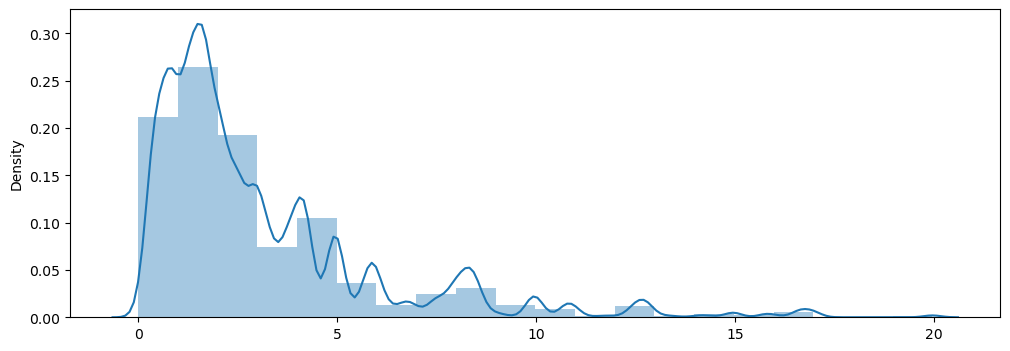

In [1226]:
plt.figure(figsize=(12,4))
sns.distplot(new_df2[new_df2['UnitPrice'] < 20]['UnitPrice'].values, kde=True, bins=20)

<Axes: xlabel='Quantity', ylabel='Density'>

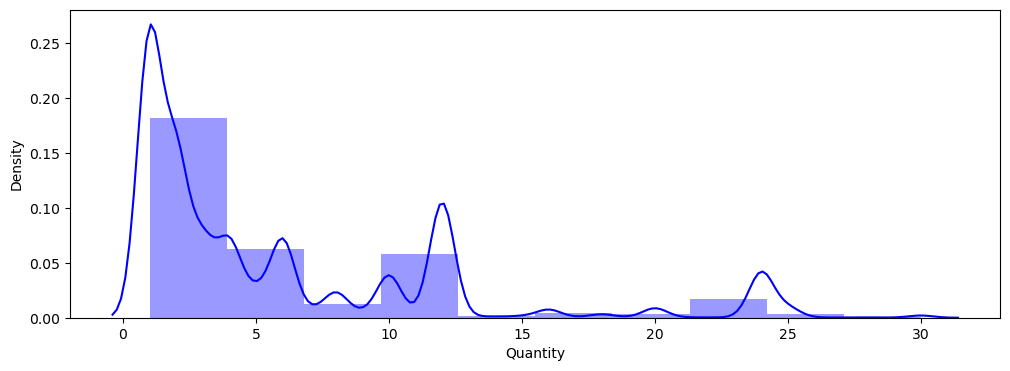

In [1228]:
plt.figure(figsize=(12,4))
sns.distplot(new_df2[new_df2['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='blue')

In [1206]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
new_df2['QuantityRange'] = pd.cut(new_df2['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
new_df2['PriceRange'] = pd.cut(new_df2['UnitPrice'], bins=bins_p)
new_df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]"


In [1207]:
new_df2['Year'] = new_df2['InvoiceDate'].dt.year
new_df2['Month'] = new_df2['InvoiceDate'].dt.month
new_df2['Day'] = new_df2['InvoiceDate'].dt.day
new_df2['Hour'] = new_df2['InvoiceDate'].dt.hour

Bucketing the month data into intervals like the previous variables.

In [1208]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
new_df2['DateRange'] = pd.cut(new_df2['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
new_df2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv,QuantityRange,PriceRange,Year,Month,Day,Hour,DateRange
527938,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,105,"(11, 14]","(0, 1]",2011,12,9,12,"(9, 12]"
527939,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,105,"(5, 8]","(2, 3]",2011,12,9,12,"(9, 12]"
527940,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,105,"(2, 5]","(4, 20]",2011,12,9,12,"(9, 12]"
527941,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,105,"(2, 5]","(4, 20]",2011,12,9,12,"(9, 12]"
527942,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,14.85,105,"(2, 5]","(4, 20]",2011,12,9,12,"(9, 12]"


In [1209]:
df_UK = new_df2[new_df2['Country'] == 'United Kingdom']
df_nonUK = new_df2[new_df2['Country'] != 'United Kingdom']

In [1210]:
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,QuantityInv,QuantityRange,PriceRange,Year,Month,Day,Hour,DateRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,40,"(5, 8]","(2, 3]",2010,12,1,8,"(9, 12]"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]",2010,12,1,8,"(9, 12]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,40,"(5, 8]","(2, 3]",2010,12,1,8,"(9, 12]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]",2010,12,1,8,"(9, 12]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,40,"(5, 8]","(3, 4]",2010,12,1,8,"(9, 12]"


In [1211]:
df_uk_model = df_UK[['UnitPrice', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]

In [1212]:
df_uk_model.head()

,UnitPrice,QuantityInv,QuantityRange,PriceRange,DateRange
0,2.55,40,"(5, 8]","(2, 3]","(9, 12]"
1,3.39,40,"(5, 8]","(3, 4]","(9, 12]"
2,2.75,40,"(5, 8]","(2, 3]","(9, 12]"
3,3.39,40,"(5, 8]","(3, 4]","(9, 12]"
4,3.39,40,"(5, 8]","(3, 4]","(9, 12]"


In [1213]:
df_data = df_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,UnitPrice,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,2.55,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,3.39,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2.75,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,3.39,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,3.39,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


Scaling the QuantityInv variable.

In [1214]:
df_data['QuantityInv'] = scale(df_data['QuantityInv'])

Defining the X and y and splitting the dataset.

In [1215]:
y = df_data['UnitPrice']
X = df_data.drop(columns=['UnitPrice'])

In [1216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Adjusting and specifying the parameters for the machine learning models.

In [1217]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

In [1218]:
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

In [1219]:
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

In [1220]:
cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.6245911028736323
MAE for LinearRegression
0.9223954212476825
MSE for LinearRegression
9.108545933390449
R2 score for LinearRegression
0.5687136914693902
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.5957542730531629
MAE for DecisionTreeRegressor
0.8299825016778437
MSE for DecisionTreeRegressor
7.675146477828906
R2 score for DecisionTreeRegressor
0.6365846298562388
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.6431029905550633
MAE for RandomForest
0.8250516872181533
MSE for RandomForest
7.417054361681814
R2 score for RandomForest
0.6488051968762594
 === End of report

### Time Series Forecasting:
#### For this purpose we are gonna be using nonUK dataset.

We are interested in forecasting the next 6 months. but since monthly data gives us a very short series we will be using the weekly data to have longer serie and try to check on the series to see if it's stationary or not and whether the serie needs some differencing.
let's make the weekly time series for sales.

In [1254]:
# Extract year and week from 'InvoiceDate' to new column 'YearWeek'
#df_UK['Week'] = df_UK['InvoiceDate'].dt.to_period('W')

# Group by 'YearWeek' and sum 'Sales'
#weekly_sales_UK = df_UK.groupby('Week')['Sales'].sum()

# Convert 'weekly_sales' Series to DataFrame
#weekly_sales_UK = weekly_sales_UK.to_frame().reset_index()

# Convert 'YearWeek' back to datetime format
#weekly_sales_UK['Week'] = weekly_sales_UK['Week'].dt.to_timestamp()

# Set 'YearWeek' as the DataFrame index
#weekly_sales_UK.set_index('Week', inplace=True)

In [1255]:
#weekly_sales_UK.plot(figsize=(15, 6))
#plt.show()

From the plot it's obvious that the serie has a trend and also is not stationary. so this serie needs differencing.
Let's check the adfuller test to see the p-value.

In [1256]:
#result = adfuller(weekly_sales_UK)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
#    print('\t%s: %.3f' % (key, value))

In [1257]:
# Original Series
#fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,10))
#axes[0, 0].plot(weekly_sales_UK); axes[0, 0].set_title('Original Series')
#plot_acf(weekly_sales_UK, ax=axes[0, 1])

# 1st Differencing
#axes[1, 0].plot(weekly_sales_UK.diff()); axes[1, 0].set_title('1st Order Differencing')
#plot_acf(weekly_sales_UK.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
#axes[2, 0].plot(weekly_sales_UK.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(weekly_sales_UK.diff().diff().dropna(), ax=axes[2, 1])

#plt.show()

Fitting different ARIMA models

In [1258]:
# 1,1,1 ARIMA Model
#modelUK1 = ARIMA(weekly_sales_UK, order=(1,1,1))
#model_fitUK1 = modelUK1.fit()
#print(model_fitUK1.summary())#

### Dataset for NON_UK countries

In [860]:
# Extract year and week from 'InvoiceDate' to new column 'YearWeek'
df_without_UK['Week'] = df_without_UK['InvoiceDate'].dt.to_period('W')

# Group by 'YearWeek' and sum 'Sales'
weekly_sales_nonUK = df_without_UK.groupby('Week')['Sales'].sum()

# Convert 'weekly_sales' Series to DataFrame
weekly_sales_nonUK = weekly_sales_nonUK.to_frame().reset_index()

# Convert 'YearWeek' back to datetime format
weekly_sales_nonUK['Week'] = weekly_sales_nonUK['Week'].dt.to_timestamp()

# Set 'YearWeek' as the DataFrame index
weekly_sales_nonUK.set_index('Week', inplace=True)

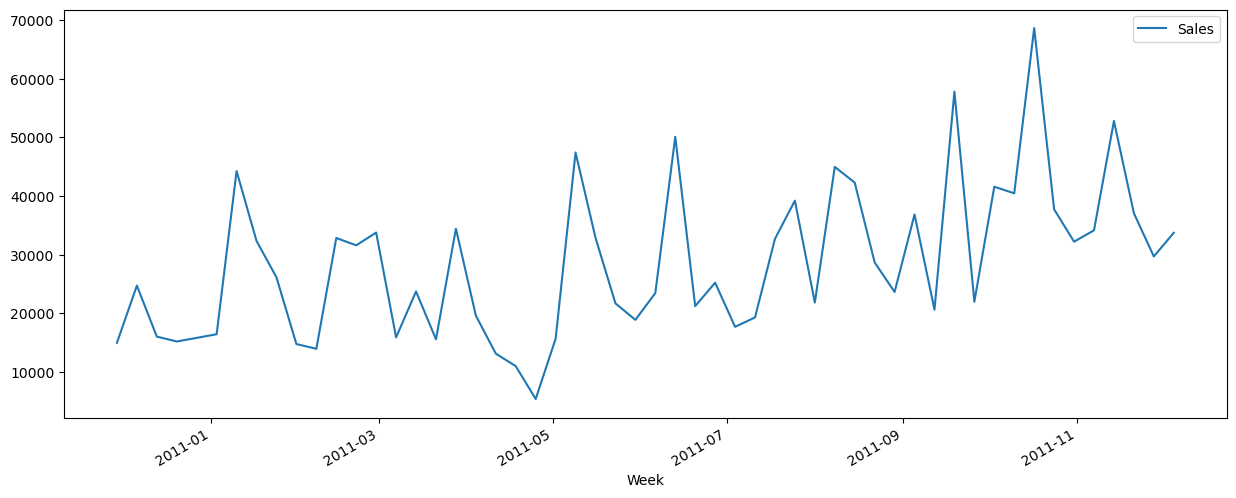

In [862]:
weekly_sales_nonUK.plot(figsize=(15, 6))
plt.show()

In [863]:
result = adfuller(weekly_sales_nonUK)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.234714
p-value: 0.193888
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


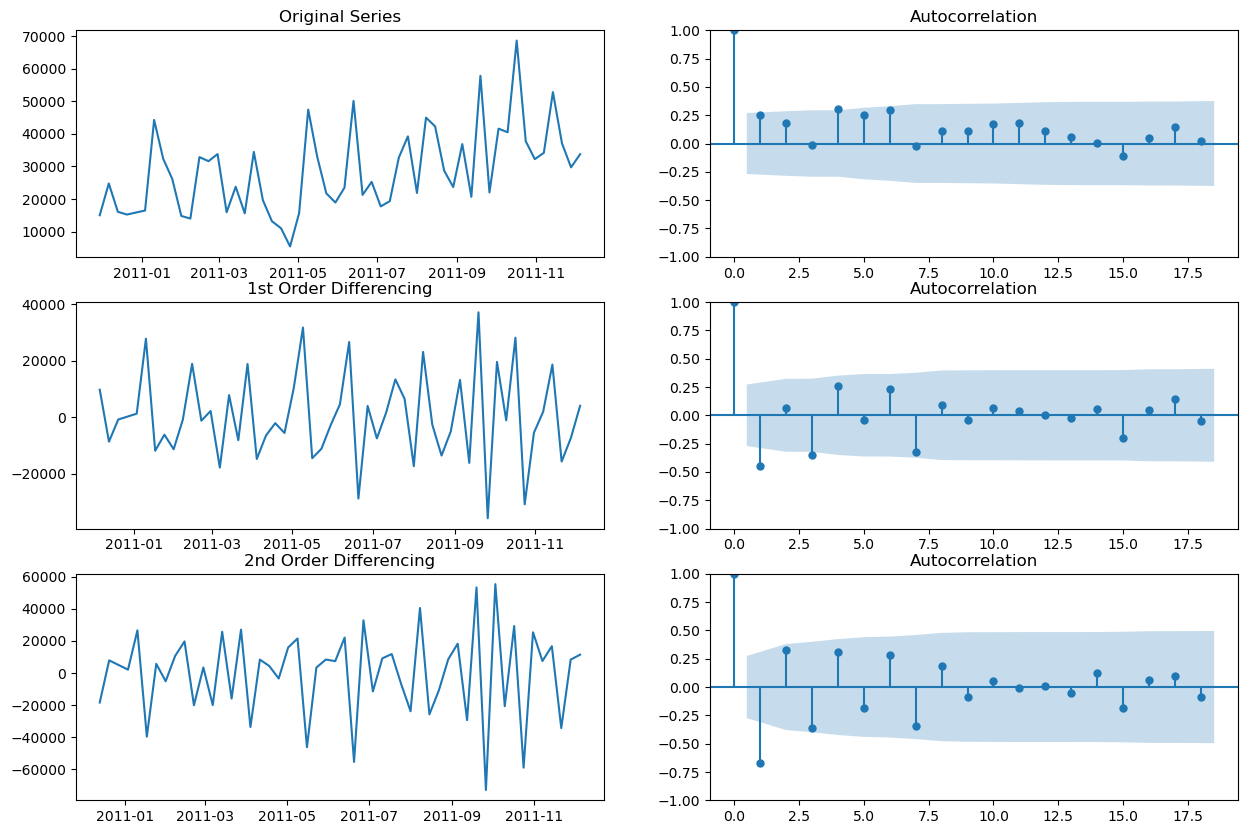

In [864]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,10))
axes[0, 0].plot(weekly_sales_nonUK); axes[0, 0].set_title('Original Series')
plot_acf(weekly_sales_nonUK, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(weekly_sales_nonUK.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(weekly_sales_nonUK.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(weekly_sales_nonUK.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(weekly_sales_nonUK.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

This series is almost stationary itself but however there's a slow trend can be observed and also we can see from the adfuller test that the P-value is larger than 0.05 and it needs differencing of 1. and by applying one differing the series become stationary.
Now let's check diffferent ARIMA models on the series.

In [927]:
# define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# initialize a DataFrame to store the results
results_bic = pd.DataFrame(columns=['param', 'BIC'])

# loop through each combination of parameters
for param in pdq:
    try:
        # create and fit the ARIMA model
        model = ARIMA(weekly_sales_nonUK, order=param)
        model_fit = model.fit()

        # get the BIC
        bic = model_fit.bic
        # get the AIC
        aic = model_fit.aic

        # record the BIC and parameters
        results_bic = results_bic.append({'param': param, 'BIC': bic, 'AIC' : aic}, ignore_index=True)

    except Exception as e:
        continue

# find the lowest BIC
best_param = results_bic.sort_values('BIC').iloc[0]

print(f"The best ARIMA model is ARIMA{best_param.param} with BIC={best_param.BIC}")
print(f"The best ARIMA model is ARIMA{best_param.param} with AIC={best_param.AIC}")

The best ARIMA model is ARIMA(0, 2, 2) with BIC=1124.3363460005053
The best ARIMA model is ARIMA(0, 2, 2) with AIC=1118.5408691023324


2011-12-11    41047.998195
2011-12-18    41521.389146
2011-12-25    41994.780097
2012-01-01    42468.171049
2012-01-08    42941.562000
2012-01-15    43414.952951
2012-01-22    43888.343902
2012-01-29    44361.734853
2012-02-05    44835.125805
2012-02-12    45308.516756
2012-02-19    45781.907707
2012-02-26    46255.298658
2012-03-04    46728.689609
2012-03-11    47202.080561
2012-03-18    47675.471512
2012-03-25    48148.862463
2012-04-01    48622.253414
2012-04-08    49095.644365
2012-04-15    49569.035316
2012-04-22    50042.426268
2012-04-29    50515.817219
2012-05-06    50989.208170
2012-05-13    51462.599121
2012-05-20    51935.990072
2012-05-27    52409.381024
2012-06-03    52882.771975
Freq: W-SUN, Name: predicted_mean, dtype: float64


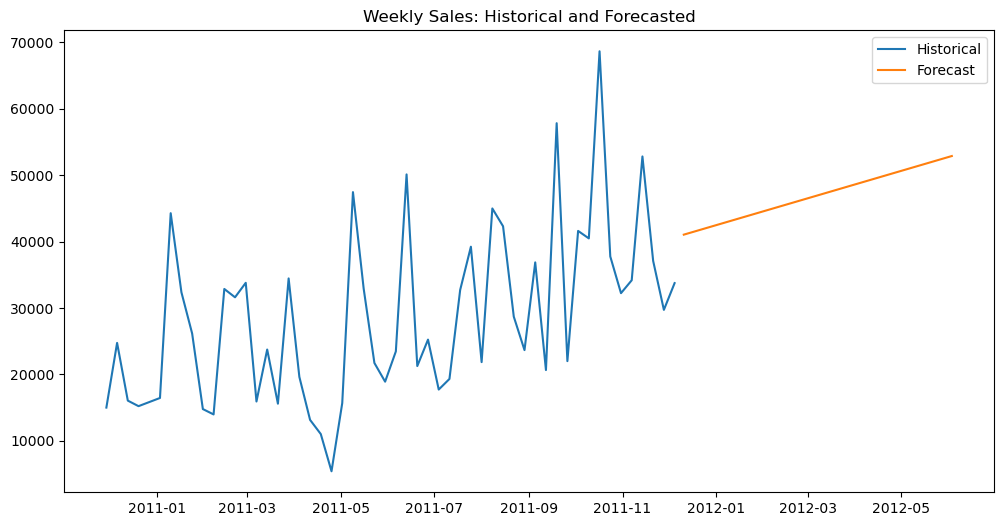

In [1259]:
# First, fit the model to the entire data
model = ARIMA(weekly_sales_nonUK, order=(0,2,2))
model_fit = model.fit()

# Specify the number of steps to forecast
n_periods = 26

# Forecast the data
forecast= model_fit.forecast(steps=n_periods)

# Create date index for the forecasted data (assuming weekly frequency)
fc_index = pd.date_range(start=weekly_sales_nonUK.index[-1], periods=n_periods, freq='W')

# Convert forecast to a pandas series
fc_series = pd.Series(forecast, index=fc_index)
forecast.index = fc_index

# Convert the forecast series to use the new date index
forecast.index = fc_index

# Now you can use forecast directly as fc_series
fc_series = forecast

print(fc_series)

# Plot the forecasted data
plt.figure(figsize=(12,6))
plt.plot(weekly_sales_nonUK, label='Historical')
plt.plot(fc_series, label='Forecast')
plt.legend(loc='best')
plt.title('Weekly Sales: Historical and Forecasted')
plt.show()

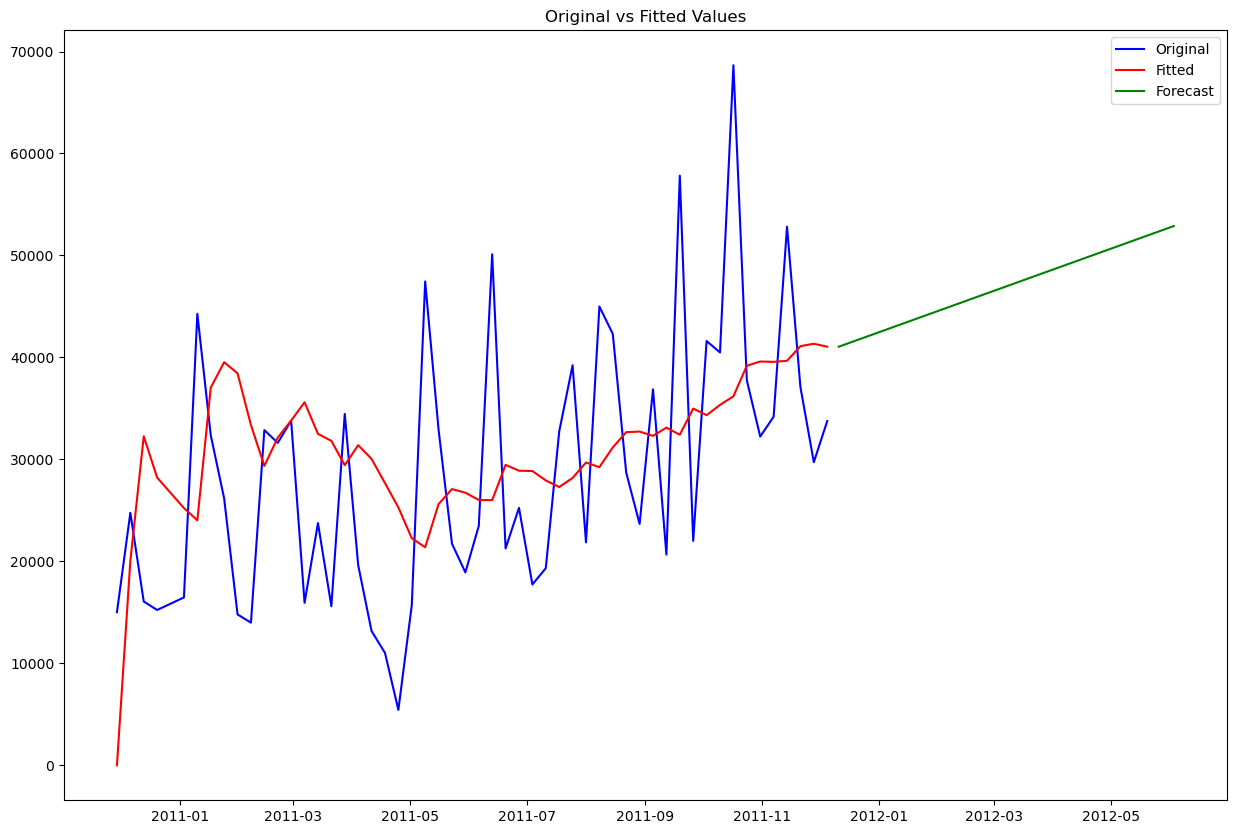

In [1260]:
model8 = ARIMA(weekly_sales_nonUK, order=(0,2,2))
model_fit8 = model8.fit()  # fit the model

# Plot the original series
plt.figure(figsize=(15,10))
plt.plot(weekly_sales_nonUK, color = 'blue', label='Original')

# Plot the fitted values
fitted_values = model_fit8.fittedvalues
plt.plot(fitted_values, color = 'red', label='Fitted')
plt.plot(fc_series, color = 'green', label='Forecast')

plt.title('Original vs Fitted Values')
plt.legend(loc='best')
plt.show()

In [929]:
# 3,1,3 ARIMA Model
modelUK5 = ARIMA(weekly_sales_nonUK, order=(3,1,3))
model_fitUK5 = modelUK5.fit()
print(model_fitUK5.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   53
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -559.721
Date:                Fri, 14 Jul 2023   AIC                           1133.443
Time:                        15:50:49   BIC                           1147.101
Sample:                             0   HQIC                          1138.679
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0594      0.271      0.219      0.826      -0.471       0.590
ar.L2         -0.8591      0.162     -5.301      0.000      -1.177      -0.541
ar.L3         -0.2336      0.277     -0.843      0.3

2011-12-11    37418.800334
2011-12-18    51023.813414
2011-12-25    42080.577693
2012-01-01    29004.474338
2012-01-08    32733.526783
2012-01-15    46278.144257
2012-01-22    46933.158971
2012-01-29    34464.320206
2012-02-05    29997.246168
2012-02-12    40291.396548
2012-02-19    47653.116056
2012-02-26    40289.670584
2012-03-04    31123.078106
2012-03-11    35185.310737
2012-03-18    45021.913837
2012-03-25    44257.258827
2012-04-01    34811.976977
2012-04-08    32610.295388
2012-04-15    40772.947187
2012-04-22    45355.539015
2012-04-29    39129.133374
2012-05-06    32915.606706
2012-05-13    36825.506989
2012-05-20    43850.378604
2012-05-27    42359.821248
2012-06-03    35322.675227
Freq: W-SUN, Name: predicted_mean, dtype: float64


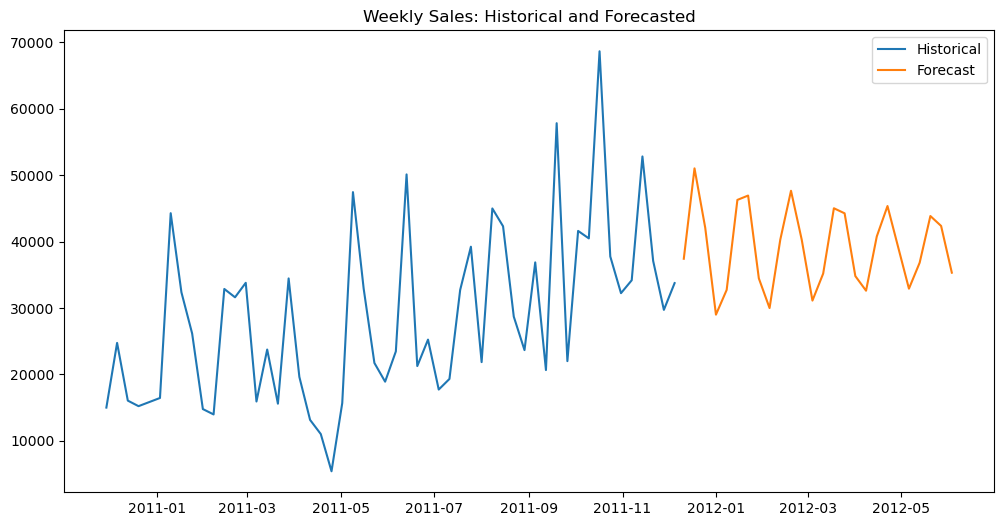

In [1262]:
# First, fit the model to the entire data 
model = ARIMA(weekly_sales_nonUK, order=(3,1,3))
model_fit = model.fit()

# Specify the number of steps to forecast (6 months)
n_periods = 26

# Forecast the data
forecast= model_fit.forecast(steps=n_periods)

# Create date index for the forecasted data (assuming weekly frequency)
fc_index = pd.date_range(start=weekly_sales_nonUK.index[-1], periods=n_periods, freq='W')

# Convert forecast to a pandas series
fc_series = pd.Series(forecast, index=fc_index)
forecast.index = fc_index

# Convert the forecast series to use the new date index
forecast.index = fc_index

# Now you can use forecast directly as fc_series
fc_series = forecast

print(fc_series)

# Plot the forecasted data
plt.figure(figsize=(12,6))
plt.plot(weekly_sales_nonUK, label='Historical')
plt.plot(fc_series, label='Forecast')
plt.legend(loc='best')
plt.title('Weekly Sales: Historical and Forecasted')
plt.show()


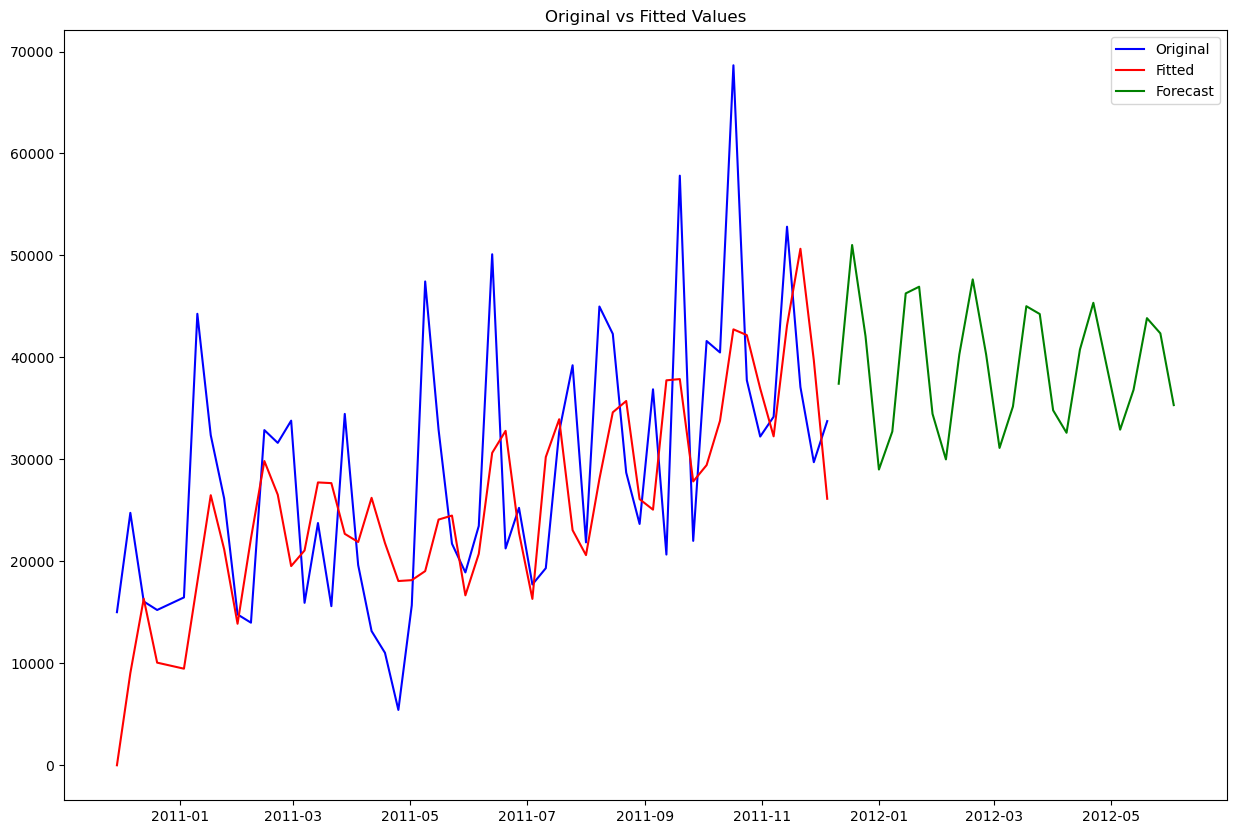

In [1263]:
model8 = ARIMA(weekly_sales_nonUK, order=(3,1,3))
model_fit8 = model8.fit()  # fit the model

# Plot the original series
plt.figure(figsize=(15,10))
plt.plot(weekly_sales_nonUK, color = 'blue', label='Original')

# Plot the fitted values
fitted_values = model_fit8.fittedvalues
plt.plot(fitted_values, color = 'red', label='Fitted')
plt.plot(fc_series, color = 'green', label='Forecast')

plt.title('Original vs Fitted Values')
plt.legend(loc='best')
plt.show()

Let's also check the RMSE with train and test sets:

In [934]:
data = weekly_sales_nonUK.values

# Split into train and test sets 
train, test = data[:40], data[40:]

# Fit the model
model = ARIMA(train, order=(3,1,3)) 
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate errors
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))

print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)

MAE: 10330.256
RMSE: 13163.232


In [937]:
data = weekly_sales_nonUK.values

# Split into train and test sets 
train, test = data[:40], data[40:]

# Fit the model
model = ARIMA(train, order=(0,2,2)) 
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate errors
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))

print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)

MAE: 10417.951
RMSE: 13441.392


It can be observed that the MAE and RMSE for the ARIMA model with the order (3,1,3) are lower.

### Task 4: Insights and Recommendations
Based on my analysis and observations here are some recommendations.

1. Product Sales in Various Regions: The UK accounts for approximately 92% of all sales. Other significant markets include the Netherlands, Ireland, Germany, France, and Australia. To further boost sales, the company should consider strengthening its marketing strategies in these areas. 

2. Product Focus: The 'Regency cakestand 3 tier' is a top-performing product in both the UK and other countries. The company could consider running special promotions or deals on this product to encourage further sales. Additionally, understanding why this product is so popular could help in the development of future products.

3. Sales Fluctuations: There are noticeable fluctuations in the weekly sales data, with sales dipping to zero in early 2011, likely due to the store closure. The company may want to consider alternative strategies during these periods, such as online sales or pre-holiday promotions.

4. Addressing Negative Values and Outliers: There are negative values and outliers in both 'Quantity' and 'UnitPrice' data that may distort the analysis. These anomalies may be a result of transactions being canceled or due to bad debts. It's recommended to investigate these anomalies further to understand their root cause and take appropriate action to minimize their occurrence in the future.

5. Price Analysis Over Time: The analysis reveals a trend in unit prices over time. This insight can be used to predict future sales and develop pricing strategies. Additionally, the company might want to investigate the cause of price fluctuations to further optimize pricing.

6. Time-Series Forecasting: Utilizing ARIMA models for time-series forecasting could help the company understand sales patterns over time and make accurate predictions for future sales. This could assist in better inventory management and planning marketing strategies.

7. Inventory Management: A thorough analysis of the product sales can help in maintaining the right inventory. For example, ensuring that the top 15 products with the highest sales are always stocked can help increase the overall sales performance.

8. Product Variety: While focusing on top-performing products, it's also important not to ignore the lowest-selling products. Sometimes, it's the variety of products that attract more customers. Strategies can be developed to increase their sales, like bundling them with top-selling products.
